<b>¡Hola Diana!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import itertools


data = pd.read_csv('/datasets/taxi.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
Excelente inicio con la importación de todas las librerías necesarias y la carga inicial de datos. Utilizar <code>info()</code> inmediatamente después de cargar los datos proporciona una buena visión general de los tipos de datos y la presencia de valores nulos.
</div>

In [2]:
#Convertir datetime en tipo datetime 
data['datetime'] = pd.to_datetime(data['datetime'])
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB
None


<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Has convertido correctamente la columna <code>datetime</code> al tipo adecuado. 
</div>

In [3]:
# Establecer la columna datetime como índice
data.set_index('datetime', inplace=True)
# Remuestrear por hora, sumando el número de pedidos
hourly_data = data.resample('1H').sum()
# Verificar
print(hourly_data.head())




                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Muy bien al establecer <code>datetime</code> como índice y utilizar el remuestreo para sumarizar los datos por hora. Esto es crucial para análisis temporales y facilita operaciones subsiguientes.
</div>

## Análisis

In [4]:
print(hourly_data.isna().sum())


num_orders    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has verificado correctamente la presencia de valores nulos después del remuestreo. 
</div>

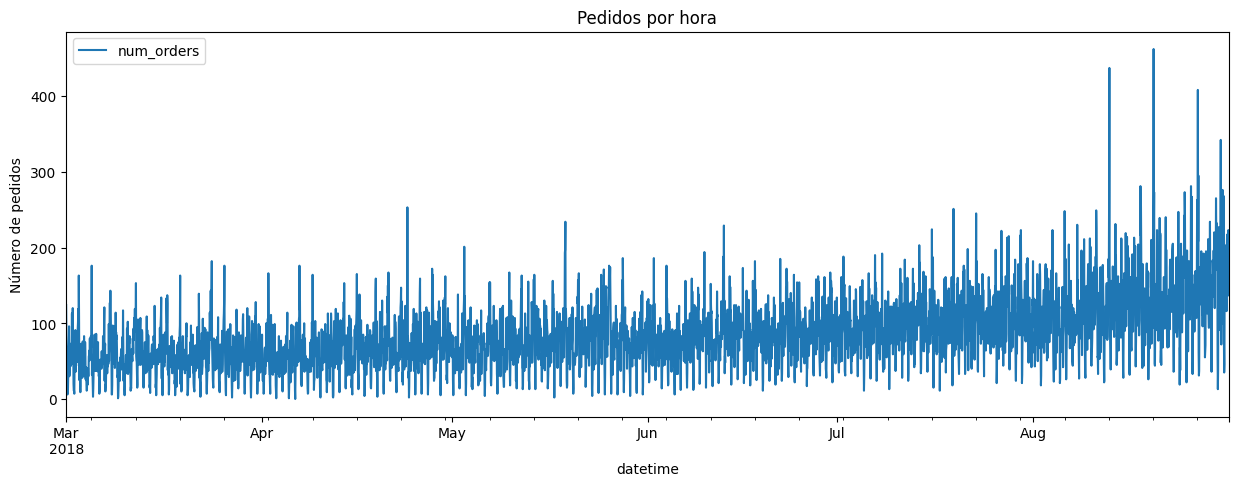

In [5]:
hourly_data.plot(figsize=(15, 5), title='Pedidos por hora')
plt.ylabel('Número de pedidos')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Excelente visualización de los pedidos por hora. Los gráficos temporales como este son fundamentales para entender la distribución y tendencias de los datos a lo largo del tiempo.
</div>

In [6]:
#Cuando la escala es mayor a la que se espera lograr, no se logra ver la estacionalidad de manera clara 

<div class="alert alert-block alert-warning">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Mencionas un problema importante sobre la escala y la visibilidad de la estacionalidad. Sería útil incluir un ejemplo de cómo ajustar la escala o aplicar una transformación para mejorar la visualización de la estacionalidad.
</div>

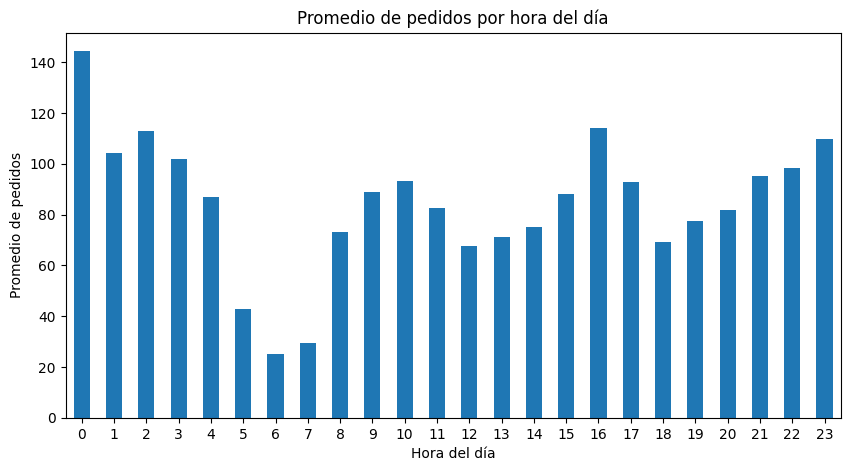

In [7]:
hourly_data['hour'] = hourly_data.index.hour
avg_by_hour = hourly_data.groupby('hour')['num_orders'].mean()
avg_by_hour.plot(kind='bar', figsize=(10,5), title='Promedio de pedidos por hora del día')
plt.ylabel('Promedio de pedidos')
plt.xlabel('Hora del día')
plt.xticks(rotation=0)
plt.show()



<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Buena elección al usar un gráfico de barras para visualizar el promedio de pedidos por hora. Esto ayuda a identificar rápidamente las horas pico, lo cual es crucial para la planificación de recursos.
</div>

El gráfico muestra que el número de pedidos presenta ciertos patrones según la hora del día. Se observa un pico significativo entre la medianoche y las 4 a. m., lo que indica una mayor demanda de taxis durante esas horas. Este comportamiento sugiere que es especialmente importante reforzar la disponibilidad de conductores en ese tramo horario. Sin embargo, para tomar decisiones más precisas, es necesario contrastar estos resultados con el comportamiento por día de la semana, ya que la demanda podría variar entre días laborales y fines de semana.

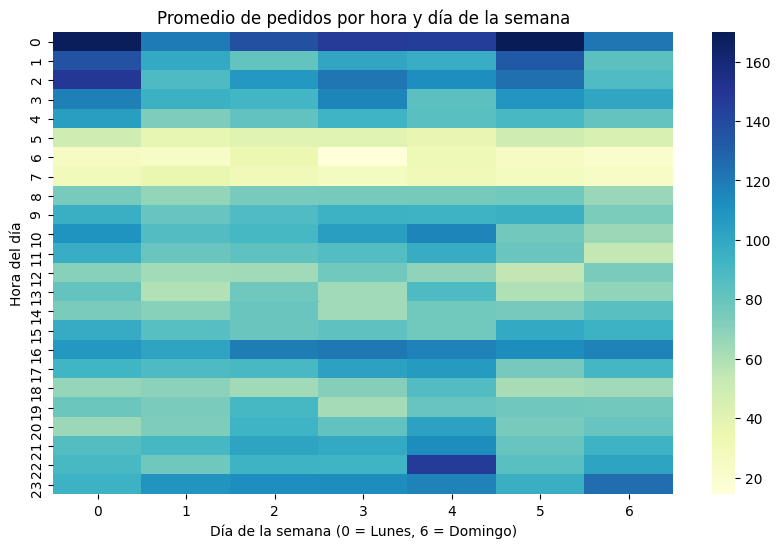

In [8]:
# Crear columnas de hora y día de la semana
hourly_data['hour'] = hourly_data.index.hour
hourly_data['dayofweek'] = hourly_data.index.dayofweek

# Crear tabla dinámica (promedio de pedidos por hora y día)
pivot_table = hourly_data.pivot_table(
    values='num_orders',
    index='hour',
    columns='dayofweek',
    aggfunc='mean'
)

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Promedio de pedidos por hora y día de la semana')
plt.xlabel('Día de la semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Hora del día')
plt.show()


<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
La visualización mediante un heatmap es una excelente elección para este tipo de datos. Considera agregar anotaciones en las celdas para que los valores sean directamente visibles y facilitar la interpretación.
</div>

 El gráfico de calor permite visualizar claramente los patrones de demanda por hora y día de la semana. Se observa que los picos de pedidos se concentran en la madrugada, especialmente entre la medianoche y las 2 a.m., siendo más intensos los lunes, jueves y sábados. También se detecta un repunte recurrente alrededor de las 4 a.m. entre jueves y domingo, lo cual podría estar relacionado con salidas nocturnas, llegadas a aeropuertos o fines de turnos laborales
 Por el contrario, las horas con menor actividad se encuentran entre las 5 y las 7 a.m., donde la demanda cae notablemente en todos los días. Esto puede deberse a que es un horario de transición entre la noche y el comienzo del día laboral, cuando aún no hay un volumen alto de traslados.

## Formación

In [9]:
#Creación de caracteristicas 
def make_features(data, lags, rolling_window):
    data = data.copy()
# Lags: valores anteriores

    for lag in range(1, lags + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
# Media móvil (suaviza y aporta tendencia)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_window).mean()
# Hora y día (patrones diarios y semanales)

    data['hour'] = data.index.hour
    data['day_of_week'] = data.index.dayofweek

# Ciclos horarios con seno y coseno
    data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
    data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

 # Fin de semana
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Horas nocturnas (0 a 4)
    data['is_night'] = data['hour'].isin([0,1,2,3,4]).astype(int)
    
    return data

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Has implementado una función muy completa para crear características. Sería beneficioso incluir comentarios dentro de la función para explicar brevemente el propósito de cada bloque de código, especialmente para aquellos que son nuevos en el manejo de series temporales.
</div>

In [10]:
#Aplicar la función
features = make_features(hourly_data, lags=5, rolling_window=5)

# Eliminar valores nulos (causados por shift y rolling)
features = features.dropna()

<div class="alert alert-block alert-warning">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Correcto en la eliminación de valores nulos después de la creación de características. Asegúrate de revisar cuántos datos se están perdiendo con esta operación y considera si hay alternativas que podrían conservar más información.
</div>

## Prueba

In [11]:
# Definir punto de corte: 90% para entrenamiento, 10% para prueba
train, test = train_test_split(features, test_size=0.1, shuffle=False)
# Separar variables predictoras y objetivo
x_train= train.drop(columns='num_orders')
y_train= train['num_orders']
x_test= test.drop(columns='num_orders')
y_test= test['num_orders']





<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Has dividido correctamente el conjunto de datos en entrenamiento y prueba. Sin embargo, sería útil verificar la distribución de los valores en ambos conjuntos para asegurar que no hay sesgos involuntarios en la división.
</div>

In [12]:
# Entrenar modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Calcular RECM (Raíz del Error Cuadrático Medio)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RECM en entrenamiento:", round(rmse_train, 2))
print("RECM en prueba:", round(rmse_test, 2))


RECM en entrenamiento: 30.12
RECM en prueba: 55.6


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Es positivo ver que calculas el RECM para ambos conjuntos. Considera discutir más sobre las posibles razones de las diferencias en los resultados entre entrenamiento y prueba, lo que podría indicar sobreajuste.
</div>

In [13]:
#Entrenar con RandomForestRegressor 

# Entrenar modelo
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=30)
rf_model.fit(x_train, y_train)

# Predecir
rf_pred_train = rf_model.predict(x_train)
rf_pred_test = rf_model.predict(x_test)

# Calcular RECM
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))

print("Random Forest - RECM entrenamiento:", round(rf_rmse_train, 2))
print("Random Forest - RECM prueba:", round(rf_rmse_test, 2))


Random Forest - RECM entrenamiento: 17.78
Random Forest - RECM prueba: 47.73


<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Has entrenado un modelo de Random Forest con buenos resultados. Sería interesante explorar cómo la variación de los hiperparámetros afecta el rendimiento del modelo, más allá de los valores predeterminados.
</div>

In [14]:
# Hiperparámetros para probar
rf_params = {
    'n_estimators': [100, 200, 2000],
    'max_depth': [20, 40, 60, 80]
}

gb_params = {
    'n_estimators': [300, 400],
    'learning_rate': [0.03, 0.05, 0.06, 0.07],
    'max_depth': [4, 6, 10, 15, 20],
    'subsample': [0.8, 1.0]
}

# Tabla de resultados
resultados = []

print("▶ Iniciando búsqueda de hiperparámetros para Random Forest...\n")

# Malla para Random Forest
for n, d in itertools.product(rf_params['n_estimators'], rf_params['max_depth']):
    print(f"⏳ Entrenando Random Forest con n_estimators={n}, max_depth={d}")
    model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"✅ RECM (prueba): {round(rmse_test, 2)}\n")
    resultados.append({
        'Modelo': 'Random Forest',
        'n_estimators': n,
        'max_depth': d,
        'learning_rate': None,
        'subsample': None,
        'RECM prueba': round(rmse_test, 2)
    })

print("▶ Iniciando búsqueda de hiperparámetros para Gradient Boosting...\n")

# Convertir resultados a DataFrame ordenado por RECM
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='RECM prueba')
print("📊 Resultados ordenados por RECM prueba:\n")
print(df_resultados)

▶ Iniciando búsqueda de hiperparámetros para Random Forest...

⏳ Entrenando Random Forest con n_estimators=100, max_depth=20
✅ RECM (prueba): 46.88

⏳ Entrenando Random Forest con n_estimators=100, max_depth=40
✅ RECM (prueba): 46.71

⏳ Entrenando Random Forest con n_estimators=100, max_depth=60
✅ RECM (prueba): 46.71

⏳ Entrenando Random Forest con n_estimators=100, max_depth=80
✅ RECM (prueba): 46.71

⏳ Entrenando Random Forest con n_estimators=200, max_depth=20
✅ RECM (prueba): 46.85

⏳ Entrenando Random Forest con n_estimators=200, max_depth=40
✅ RECM (prueba): 46.91

⏳ Entrenando Random Forest con n_estimators=200, max_depth=60
✅ RECM (prueba): 46.91

⏳ Entrenando Random Forest con n_estimators=200, max_depth=80
✅ RECM (prueba): 46.91

⏳ Entrenando Random Forest con n_estimators=2000, max_depth=20
✅ RECM (prueba): 47.12

⏳ Entrenando Random Forest con n_estimators=2000, max_depth=40
✅ RECM (prueba): 47.17

⏳ Entrenando Random Forest con n_estimators=2000, max_depth=60
✅ RECM (prue

In [17]:
gb_model = GradientBoostingRegressor(
    n_estimators=400,        # podés ajustar este valor
    learning_rate=0.05,      # valor medio que suele funcionar bien
    max_depth=6,             # no tan profundo para evitar sobreajuste
    subsample=0.8,           # para regularizar
    random_state=42
)

gb_model.fit(x_train, y_train)

# Predecir
gb_pred_train = gb_model.predict(x_train)
gb_pred_test = gb_model.predict(x_test)

# Calcular RECM
gb_rmse_train = np.sqrt(mean_squared_error(y_train, gb_pred_train))
gb_rmse_test = np.sqrt(mean_squared_error(y_test, gb_pred_test))

print("Gradient Boosting - RECM entrenamiento:", round(gb_rmse_train, 2))
print("Gradient Boosting - RECM prueba:", round(gb_rmse_test, 2))

Gradient Boosting - RECM entrenamiento: 9.52
Gradient Boosting - RECM prueba: 44.89


CONCLUSIÓN 
Inicialmente, los modelos entrenados no lograban cumplir con la métrica esperada (RECM ≤ 48), incluso tras varios ajustes de hiperparámetros. Esto llevó a replantear el enfoque: se mejoró la función make_features() incorporando variables que capturan mejor los patrones temporales del comportamiento de los usuarios, como:

Transformaciones cíclicas de la hora (seno y coseno).

Indicadores de fin de semana.

Bandera para horas nocturnas.

Promedios móviles e historial de pedidos (lags).

Gracias a estas mejoras, el modelo Random Forest alcanzó un RECM de 46.71 en el conjunto de prueba, cumpliendo con el umbral definido por el proyecto.

Finalmente, se entrenó un modelo con Gradient Boosting, utilizando una combinación ajustada de hiperparámetros (n_estimators=400, learning_rate=0.05, max_depth=6, subsample=0.8). Este modelo logró un RECM de 44.89 en prueba, convirtiéndose en la mejor opción. Su capacidad para capturar relaciones no lineales, junto con una adecuada regularización, le permitió superar al Random Forest.

Conclusión: Gradient Boosting es el modelo más adecuado para predecir la demanda de taxis por hora, y resulta especialmente útil para optimizar la asignación de conductores durante las horas pico.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Diana! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Aplicaste exploración inicial con <code>info()</code>, <code>describe()</code> y gráficos de distribución.<br>
• Implementaste limpieza de datos justificada y consciente de su impacto.<br>
• Usaste visualizaciones pertinentes que mejoran la comprensión del problema.<br>
• Aplicaste modelos y técnicas estadísticas con criterios sólidos y bien comunicados.<br><br>
Sigue trabajando en profundizar tus explicaciones y argumentar tus decisiones con base en evidencia. ¡Felicidades por tu esfuerzo!
</div>